✨✨This notebook is the **1st** notebook of my **🧠 Timeseries Series ⏱️**, where I am trying to dive into time series and the mathematics of common techniques. 

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/time-series-starter-dataset/Month_Value_1.csv


# 🧠Time Series ⏱️ Understanding Autocorrelation🌀

In this notebook we dive into the mathematics autocorrelation, partial autocorrelation and how to create respective plots from scratch, like the Partial Auto Correlation Function. The objective is to understand autocorrelations and it's math and fully grasp plots which we normally use for time series analysis. 

# Global Variables & Settings

In [2]:
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

# Reading the Data

In [3]:
data = pd.read_csv('/kaggle/input/time-series-starter-dataset/Month_Value_1.csv')
print(f"Rows: {data.shape[0]:,}")
print(f"Cols: {data.shape[1]:,}")
pd.set_option('display.float_format', '{:,.2f}'.format)
data.head(5)

Rows: 96
Cols: 5


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,"16,010,072.12","12,729.00","1,257.76","30,024,676.00"
1,01.02.2015,"15,807,587.45","11,636.00","1,358.51","30,024,676.00"
2,01.03.2015,"22,047,146.02","15,922.00","1,384.70","30,024,676.00"
3,01.04.2015,"18,814,583.29","15,227.00","1,235.61","30,024,676.00"
4,01.05.2015,"14,021,479.61","8,620.00","1,626.62","30,024,676.00"


In [4]:
data.dtypes

Period                                       object
Revenue                                     float64
Sales_quantity                              float64
Average_cost                                float64
The_average_annual_payroll_of_the_region    float64
dtype: object

Let's convert the time column `Period` from type object to an actual datetime. 

In [5]:
data['Period'] = pd.to_datetime(data['Period'], dayfirst=True)
data['Period'][:5]

0   2015-01-01
1   2015-02-01
2   2015-03-01
3   2015-04-01
4   2015-05-01
Name: Period, dtype: datetime64[ns]

For time series data we should set the time column as the index.

In [6]:
data.set_index('Period', inplace=True)
data['Year'] = data.index.year

In [7]:
print(data.index.min())
print(data.index.max())

2015-01-01 00:00:00
2022-12-01 00:00:00


# Exploratory Data Analysis

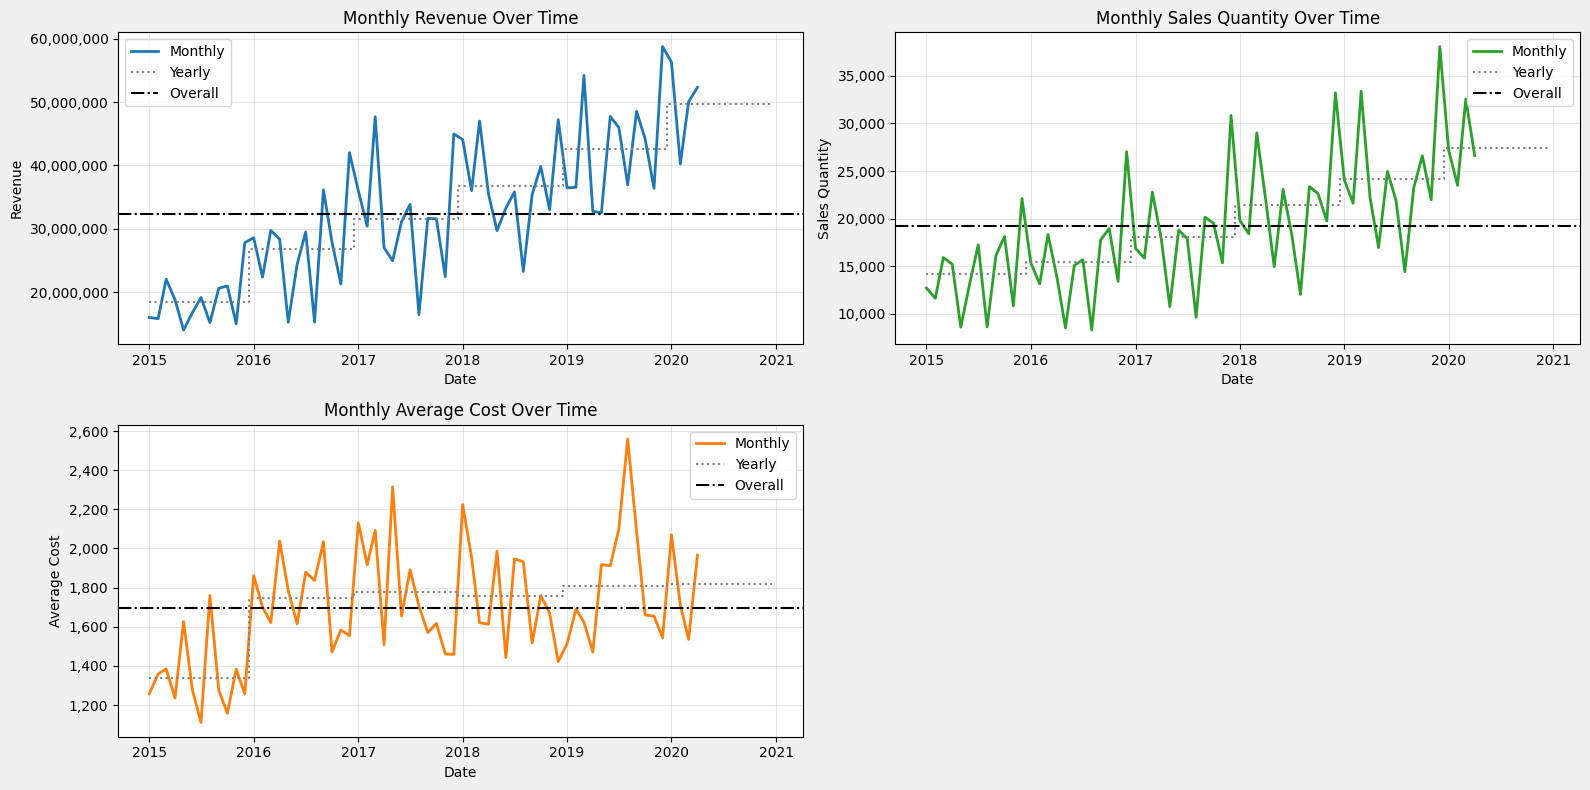

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), facecolor='#f0f0f0')
axs = axs.flatten()

def plot_metric(ax, column, color, title, ylabel):
    yearly_avg = data.groupby('Year')[column].mean()
    step_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='MS')
    step_values = step_dates.to_series().dt.year.map(yearly_avg)
    overall_avg = data[column].mean()

    ax.plot(data.index, data[column], color=color, linewidth=2, label='Monthly')
    ax.step(step_dates, step_values, where='mid', linestyle=':', color='gray', linewidth=1.5, label='Yearly')
    ax.axhline(y=overall_avg, color='black', linestyle='-.', linewidth=1.5, label='Overall')

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.2, color='grey')

    formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    ax.legend()

plot_metric(axs[0], 'Revenue', 'tab:blue', 'Monthly Revenue Over Time', 'Revenue')
plot_metric(axs[1], 'Sales_quantity', 'tab:green', 'Monthly Sales Quantity Over Time', 'Sales Quantity')
plot_metric(axs[2], 'Average_cost', 'tab:orange', 'Monthly Average Cost Over Time', 'Average Cost')

# Hide the unused 4th subplot
axs[3].axis('off')

plt.tight_layout()
plt.show()

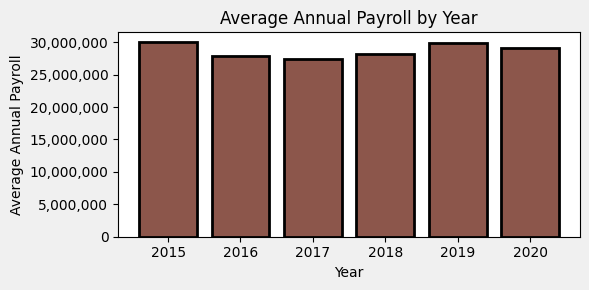

In [9]:
yearly_avg_payroll = data.groupby('Year')['The_average_annual_payroll_of_the_region'].mean()

fig = plt.figure(figsize=(6, 3), facecolor='#f0f0f0')
ax = fig.add_subplot(111, facecolor='white')

ax.bar(yearly_avg_payroll.index.astype(str), yearly_avg_payroll.values, 
       color='tab:brown', edgecolor='black', linewidth=2)

ax.set_title('Average Annual Payroll by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Payroll')
ax.grid(False)

formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Autocorrelation